# 공공데이터 상권정보 분석

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np # 수치 계산을 위해
import seaborn as sns # 데이터 시각화를 위해

## 시각화를 위한 폰트 설정

In [2]:
# 주석처리 : ctrl + /
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family='malgun Gothic')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
 * 판다스에서 데이터를 로드할 때는 read_csv를 사용
 * 데이터를 로드해서 df라는 변수에 담기
 * shape를 통해 데이터의 갯수를 찍는다. 그 결과는 (행,열)순으로 출력

In [3]:
#read_csv로 불러온 파일을 df라는 변수에 담는다
df = pd.read_csv("C:/Users/kim/jupyter/data analysis/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",low_memory=False,encoding="UTF8")
df.shape

(91335, 39)

## 데이터 미리보기
* head,tail을 통해 데이터를 미리 볼 수 있다. 

In [4]:
# head로 데이터를 미리보기
# shift + tab : docstirng을 볼 수 있음
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [5]:
# tail로 마지막 부분에 있는 데이터를 불러옴
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [6]:
# sample로 미리보기
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
12658,24911953,갤러리동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,3114010500106290013013345,NaN,울산광역시 남구 삼산로 121,680802.0,44693.0,NaN,NaN,NaN,129.320595,35.535862


## 데이터 요약하기

### 요약정보

In [7]:
# info로 데이터의 요약을 봄
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [8]:
# 컬럼명만 출력해 봄
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [9]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [10]:
True == 1 # 파이썬에서 True는 1이랑 같음

True

In [11]:
null_count = df.isnull().sum() # 결과 : True = Null / sum() : 합계개수를 나타냄 / null_count라는 변수에 담음
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

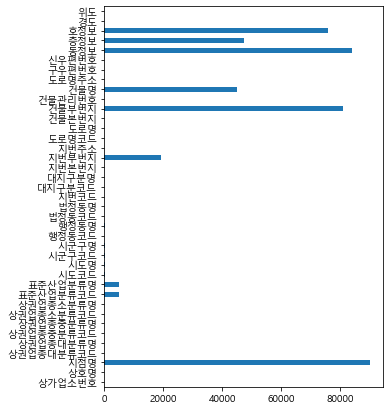

In [12]:
# 위에서 구한 결측치를 .plot.bar를 통해 막대그래프로 표현
null_count.plot.barh(figsize=(5,7)) # barh : bar 그래프의 축을 바꿈 / rot옵션 : 글자들이 회전되어 표시됨

In [13]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 만듬
# df_null-count 변수에 결과를 담아서 head로 미리보기 함

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경

In [14]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬

In [15]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_value를 통해 정렬
# 결측치가 많은 순으로 상위 10개만 출력
df_null_count_top = df_null_count.sort_values(by="결측치수",ascending = False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 특정 컬럼만 불러오기

In [16]:
# 지점명 컬럼을 불러옴
# NaN = Not a Number (결측치를 의미)
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
# "컬럼명"이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담음
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
# drop_columns 변수로 해당 컬럼 정보만 데이터 프레임에서 가져옴
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [19]:
print(df.shape) # 제거하기 전
df = df.drop(drop_columns,axis=1) 
# axis(축) 값은 기본적으로 0(열을 기준으로 하는 경우 0 / 컬럼을 기준으로 정렬하는 경우 1로..)
# df 변수에 다시 담아야 drop한 결과가 적용이 됨
print(df.shape) # 제거하고 난 뒤

(91335, 39)
(91335, 29)


In [20]:
# 제거 결과를 info로 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [21]:
# 평균값
df["위도"].mean()

36.62471119236673

In [22]:
# 중앙값
df["위도"].median()

37.23465231770329

In [23]:
# 최대값
df["위도"].max()

38.499658570559795

In [24]:
# 최소값
df["위도"].min()

33.2192896688307

In [25]:
# 갯수
df["위도"].count()

91335

### 기초 통계값 요약 - describe
 * describe를 사용하면 데이터를 요약해 볼 수 있음
 * 기본적으로 수치형 데이터를 요약해서 보여줌
 * 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최대값을 볼 수 있음


In [26]:
# 위도를 describe로 요약
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2개의 컬럼을 describe로 요약
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [28]:
# describe로 문자열 데이터 타입을 요약
df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복제거한 값 보기
 * unique로 중복을 제거한 값을 보고 nunique로 갯수를 세어보기

In [29]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [30]:
df["상권업종대분류명"].nunique()

1

In [31]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [32]:
df["상권업종중분류명"].nunique()

5

In [33]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [34]:
df["상권업종소분류명"].nunique()

34

In [35]:
# nunique 대신 len을 사용할 수도 있음
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있음

In [36]:
# value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있음
# 시도코드를 세어봄
df["시도명"].head()


0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [37]:
# 시도명을 세어봄
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [38]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있음
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

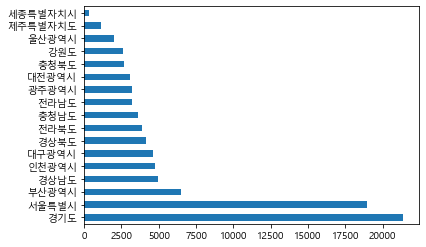

In [39]:
# pandas에는 plot기능을 내장하고 있음
# 위에서 분석한 시도명 수를 막대그래프로 표현해보자
city.plot.barh()

C:\Users\kim\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

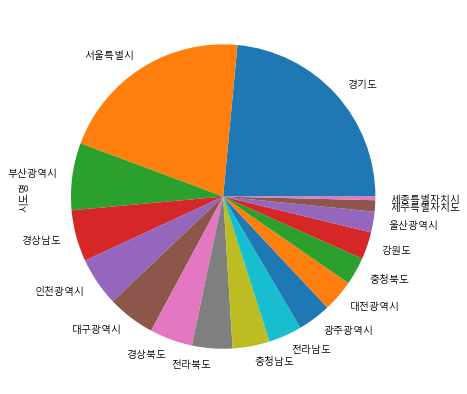

In [40]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려보자
city_normalize.plot.pie(figsize = (7,7))

<AxesSubplot:xlabel='count', ylabel='시도명'>

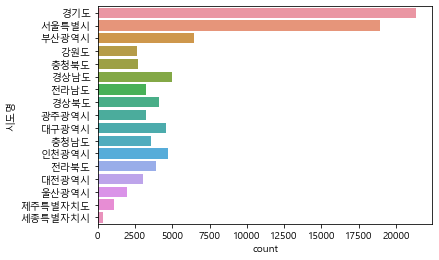

In [41]:
# seaborn의 countplot으로 그려보자 / 
# seaborn은 대체적으로 x,y,data를 넣어야 하지만, countplot은 x,y 하나만 넣어도 됨
# seaborn : 그래프 내부에서 고급 통계기능을 제공 but 데이터가 커지면 속도가 느림 (아래는 자동으로 count_value 기능 수행)
# <AxesSubplot:xlabel='count', ylabel='시도명'> -> 이런거는 아래 수식을 변수에 담아서 출력하면 없어짐
# 예) c = sns.countplot(data=df,y="시도명")
sns.countplot(data=df,y="시도명")

In [42]:
# "상권업종대분류명"으로 갯수를 세어보자
# value counts를 하게되면 결측치는 제거되고 센다
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
# "상권업종중분류명"으로 갯수를 세어보자
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [44]:
# normalize=True를 사용해 비율을 구해보자 (전체대비 비율을 보여줌)
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

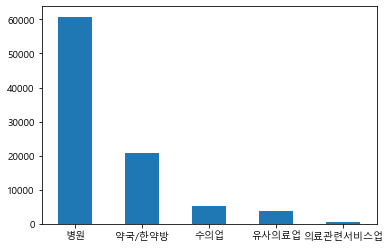

In [45]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려보자
c.plot.bar(rot=0) # rot= 회전시킬 값

<AxesSubplot:ylabel='상권업종중분류명'>

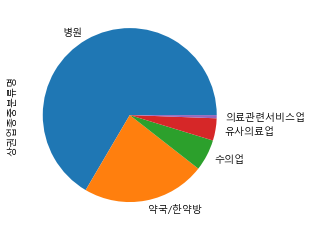

In [46]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려보자
n.plot.pie()

In [47]:
# "상권업종소분류명"에 대한 그룹화 된 값을 카운트 하자
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

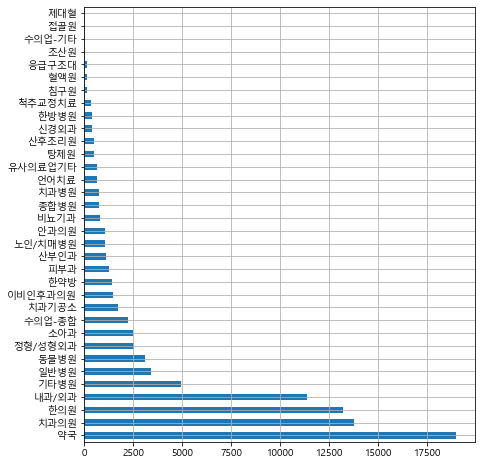

In [48]:
# "상권업종소분류명"으로 갯수를 세어보자
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려보자
c.plot.barh(figsize=(7,8),grid=True) # grid = True : 격자 표시

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봄

In [49]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아보자
# head()를 통해 미리보기를 하자

df_medical = df[df["상권업종중분류명"] =="약국/한약방"].copy() 
# 색인한 값을 다른 목적으로 사용하면 복사해서 쓰는 것을 추천
# 복사 안하면 df[df["상권업종중분류명"] =="약국/한약방"] <- 이 부분이 수정됨 (원본에 영향이 감)
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [50]:
# "상권업종대분류명"에서 "의료"만 가져오자
# df.loc를 사용하면 행, 열을 함께 가져올 수 있음
# 이 기능을 통해 "상권업종중분류명"만 가져오자
# 가져온 결과를 value_count를 통해 중분류의 갯수를 세어보자

m = df["상권업종대분류명"] == "의료" # 이것만 따로 변수를 지정해서 사용할 수 있음
df.loc[m,"상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [51]:
# 위와 똑같은 기능을 수행하는 코드. 아래와 같이 한 줄에 표현할 수도 있음
df.loc[df["상권업종대분류명"]== "의료", "상권업종중분류명"].value_counts()


병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [52]:
# 유사의료업만 따로 모아보자
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape
# df["상권업종중분류명"] == "유사의료업" -> boolean / 대괄호를 씌우면 True 값만 가져옴

(3774, 29)

In [53]:
# 상호명을 그룹화해서 갯수를 세어보자
# value_counts를 사용해서 상위 10개를 출력하자

df["상호명"].value_counts().head(10) # head의 기본 값은 5 -> 10은 별도로 지정해줘야 함


리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [54]:
# 유사의료업만 df_medi 변수에 담겨져 있음
# df_medi 변수에서 상호명으로 갯수를 세어보자
# 가장 많은 상호 상위 10개를 출력하자
df_medi["상호명"].value_counts().head(10)


리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
이사랑치과기공소     8
아트치과기공소      8
스마일치과기공소     8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [55]:
# "상권업종소분류명"이 "약국"인 것과
# "시도명"이 "서울틀별시"인 데이터만 가져온다 (가장 마지막 출력문만이 출력됨)
# and == & , or == /

# df["상권업종소분류명"] == "약국"
# df["시도명"] == "서울특별시" ##가장 마지막 출력문만이 출력됨

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")] # 각 연산자끼리 묶어줘야 함
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 구별로 보기

In [56]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수를 세어보자
# 구별로 약국이 몇개가 있는지 확인하자

df_seoul_drug["시군구명"]

33        강남구
51        강동구
130       중랑구
136       성동구
141      동대문구
         ... 
91239     성북구
91275     구로구
91288     종로구
91301     구로구
91322     중랑구
Name: 시군구명, Length: 3579, dtype: object

In [57]:
# normalize=True 를 통해 비율을 구해보자

In [58]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그리자

In [59]:
# "상권업종소분류명"이 "종합병원"인 것과